In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns #for the 2-way dataset
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

In [3]:
#Carga desde un archivo .xlsx sin indice
inmu = pd.read_excel('RetoConglomerados.xlsx')
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [4]:
#Seleccionamos las variables que analizaremos para nuestro primero modelo.
OWA1 = inmu.iloc[ : , [0,22]]
OWA1

,Alcaldia,Precio_m2
0,La Magdalena Contreras,6500.00
1,Tlahuac,1200.00
2,Cuajimalpa,17500.00
3,Tlahuac,1046.40
4,Tlahuac,1195.00
...,...,...
653,Benito Juárez,5791.80
654,Coyoacan,2200.00
655,La Magdalena Contreras,1094.44
656,Iztapalapa,650.00


In [5]:
#creamos una lista de las emosiones de CO2 y las agrupamos por cilindraje.
agrudatos1 = [group[1]['Precio_m2'] for group in OWA1.groupby('Alcaldia')] #

#Realizamos la prueba ANOVA 1 via.
estadistico_f, p_valor = stats.f_oneway(*agrudatos1)#desempaquetamos la lista en elementos individuales.
#?

# Imprimimos el resultado
print("ANOVA de una vía - Resultados:")
print(f"Puntaje F: {estadistico_f:.2f}")
print(f"P-valor: {p_valor:.4f}")

# Para simplificar la interpretación de los resultados:
alpha = 0.05 #Podemos elegir un valor considerando nuestro nivel de confianza
if p_valor < alpha:
    print("Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.")
else:
    print("No se rechaza la hipótesis nula. No existen diferencias significativas entre grupos.")

ANOVA de una vía - Resultados:
Puntaje F: 27.50
P-valor: 0.0000
Se rechaza la hipótesis nula. Existen diferencias significativas entre grupos.


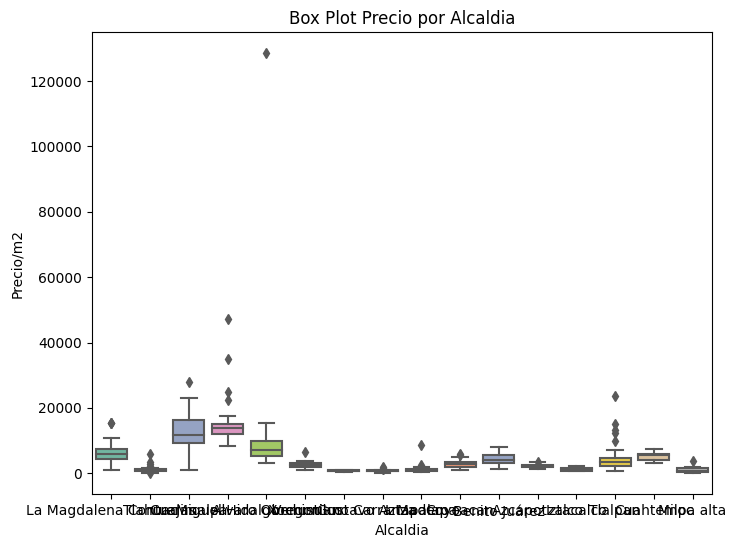

In [6]:
#visualizamos los datos:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Alcaldia', y='Precio_m2', data=OWA1, palette='Set2')
plt.title('Box Plot Precio por Alcaldia')
plt.xlabel('Alcaldia')
plt.ylabel('Precio/m2')
plt.show()

In [ ]:
#Prueba Post-Hoc
#para realizar comparaciones entre grupos
tukeyresultado1 = pairwise_tukeyhsd(OWA1['Precio_m2'], OWA1['Alcaldia'])
print("\nResultados Tukey-Kramer prueba Post Hoc:")
print(tukeyresultado1)

# ANOVA 2 WAY

In [8]:
TWA = inmu.iloc[ : , [12,14,22]]

In [9]:
# ANOVA de 2 vías.
formula = 'Precio_m2 ~ Cocina_equip + Amueblado'
modelo = ols(formula, data=TWA).fit()
tablANOVA = sm.stats.anova_lm(modelo, typ=2)

# Imprimimos los resultados
print("Resultados ANOVA de dos vías:")
print(tablANOVA)

Resultados ANOVA de dos vías:
                    sum_sq     df         F    PR(>F)
Cocina_equip  6.840043e+08    2.0  7.168247  0.000833
Amueblado     7.587256e+07    3.0  0.530088  0.661763
Residual      3.110738e+10  652.0       NaN       NaN


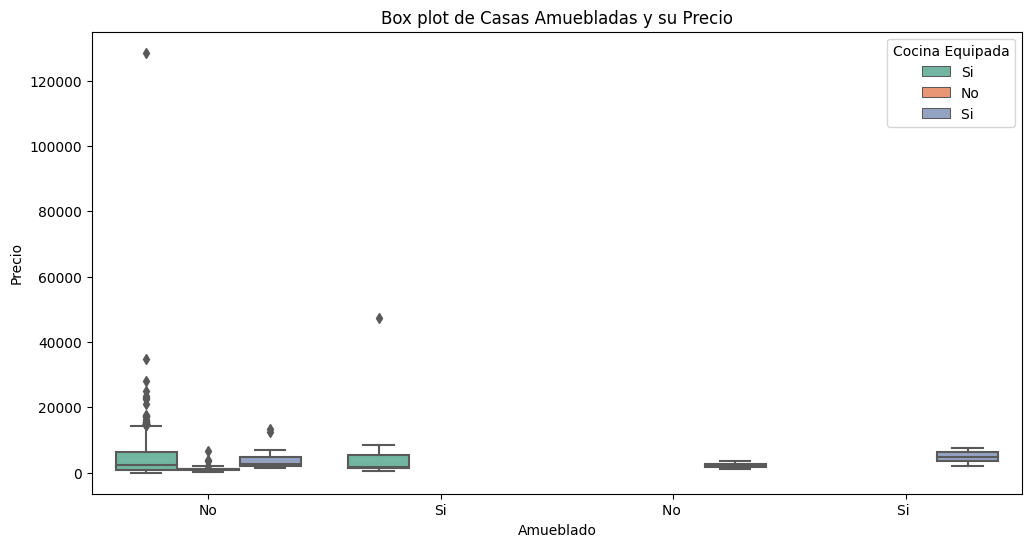

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Amueblado', y='Precio_m2', hue='Cocina_equip', data=TWA, palette='Set2')
plt.title('Box plot de Casas Amuebladas y su Precio')
plt.xlabel('Amueblado')
plt.ylabel('Precio')
plt.legend(title='Cocina Equipada')
plt.show()

In [15]:
inmu["Cocina_equip"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Si
1       Si
2       Si
3       No
4       No
      ... 
653     Si
654     Si
655     Si
656     Si
657    Si 
Name: Cocina_equip, Length: 658, dtype: object>